In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

df_bio = pd.read_csv('BioParams.csv',delimiter='\t')


In [109]:
time = df_bio['time']

In [110]:
df_bio.head()

,time,Reg,myo0_1,myo1_17,myo1_7,myo17_13,myo1_10,myo10_17
0,822.554345,57.957771,5.000483,0,5.000134,5.000068,5.000068,5.000068
1,823.554345,60.070851,5.049645,0,5.013635,5.006918,5.006918,5.006918
2,824.554345,62.275483,5.100581,0,5.027377,5.013841,5.013844,5.013845
3,825.554345,64.573477,5.153346,0,5.041370,5.020840,5.020850,5.020851
4,826.554345,66.966302,5.207993,0,5.055623,5.027916,5.027938,5.027942


In [111]:
df_bio.tail()

,time,Reg,myo0_1,myo1_17,myo1_7,myo17_13,myo1_10,myo10_17
510,1328.953655,201.620711,27.286173,0,27.502770,27.120270,27.615503,25.050527
511,1329.953655,203.398275,27.454476,0,27.573583,27.143889,27.638380,25.076544
512,1330.953655,205.084885,27.623580,0,27.646256,27.168001,27.661640,25.103082
513,1331.953655,206.676327,27.793400,0,27.720835,27.192620,27.685291,25.130156
514,1332.953655,208.168326,27.963850,0,27.797367,27.217758,NaN,NaN


<IPython.core.display.Javascript object>


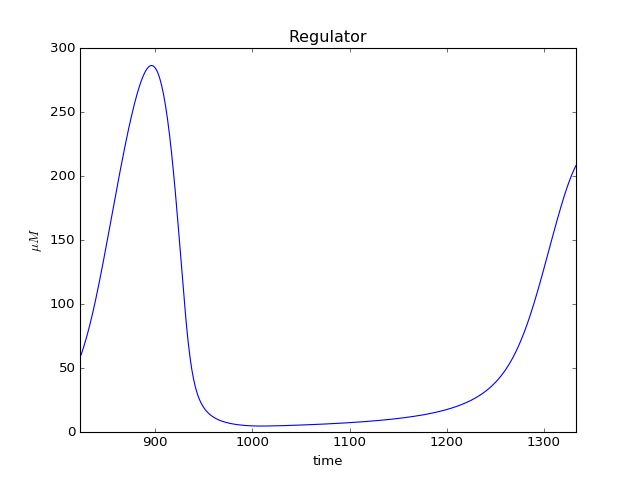

In [112]:
plt.figure(1)
plt.title('Regulator')
plt.plot(time,df_bio['Reg'])
plt.xlim([time.min(),time.max()])
plt.xlabel("time")
plt.ylabel("$\mu M$")
plt.show()

<IPython.core.display.Javascript object>


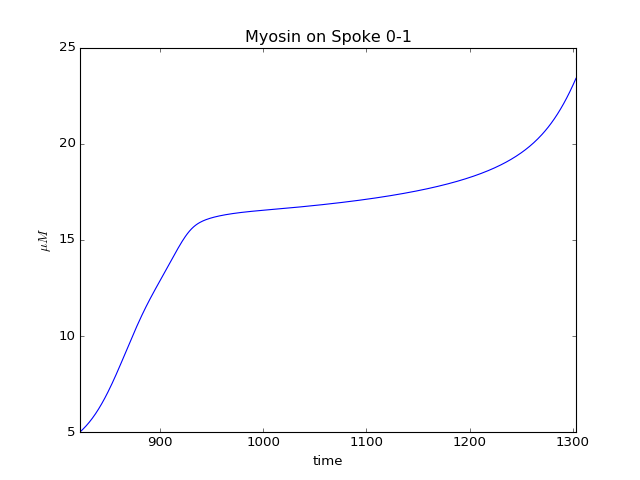

In [105]:
plt.figure(2)
plt.title('Myosin on Spoke 0-1')
plt.plot(time,df_bio['myo0_1'])
plt.xlim([time.min(),time.max()])
plt.xlabel("time")
plt.ylabel("$\mu M$")
plt.show()

<IPython.core.display.Javascript object>


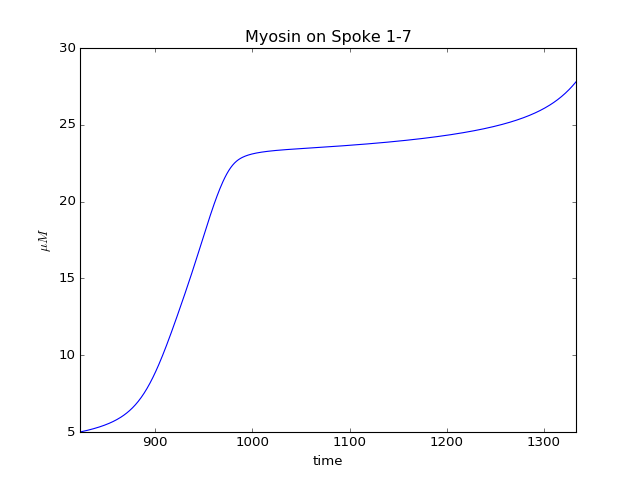

In [113]:
plt.figure(3)
plt.title('Myosin on Spoke 1-7')
plt.plot(time,df_bio['myo1_7'])
plt.xlim([time.min(),time.max()])
plt.xlabel("time")
plt.ylabel("$\mu M$")
plt.show()

<IPython.core.display.Javascript object>


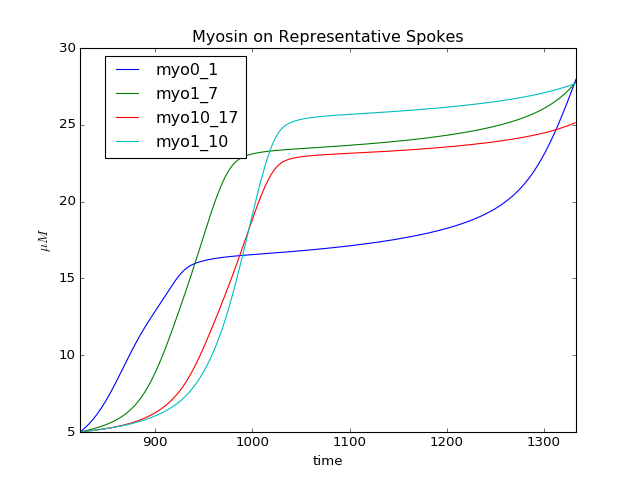

In [114]:
plt.figure(4)
plt.title('Myosin on Representative Spokes')
plt.plot(time,df_bio['myo0_1'])
plt.plot(time,df_bio['myo1_7'])
plt.plot(time,df_bio['myo10_17'])
plt.plot(time,df_bio['myo1_10'])
plt.xlim([time.min(),time.max()])
plt.xlabel("time")
plt.ylabel("$\mu M$")
plt.legend(bbox_to_anchor=(0.35,1))
plt.show()

In [94]:
df_bio.tail()

,time,Reg,myo0_1,myo1_17,myo1_7,myo17_13,myo1_10,myo10_17
419,1237.953655,30.747918,19.135076,0,24.739799,26.043651,26.409617,23.805145
420,1238.953655,31.306388,19.165846,0,24.753280,26.049842,26.417656,23.812775
421,1239.953655,31.881503,19.197161,0,24.766914,26.056094,26.425760,23.820475
422,1240.953655,32.473894,19.229035,0,24.780705,26.062407,26.433930,23.828243
423,1241.953655,33.084222,19.261485,0,24.794655,26.068783,NaN,NaN


In [ ]:
fig, ax1 = plt.subplots()
plt.title('')
ax1.plot(time,df_bio.myo0,'b-')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Myosin', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
    
ax2 = ax1.twinx()
ax2.plot(time, df_bio.force0, 'r-')
ax2.set_ylabel('Force', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

In [ ]:
dt = np.diff(time)

In [ ]:
print("The max dt used was: ", np.amax(dt))
print("The min dt used was: ", np.amin(dt))
print("The mean dt used was:", np.mean(dt))
np.mean(dt)*10

In [ ]:
%matplotlib auto
p0 = (x0[0],y0[0])
p1 = (x1[0],y1[0])
p2 = (x2[0],y2[0])
p3 = (x3[0],y3[0])
p4 = (x4[0],y4[0])
p5 = (x5[0],y5[0])

nodes = [p0,p1,p2,p3,p4,p5]

G = nx.Graph()

i = 0
for node in nodes:
    G.add_node(i,{'pos':node,'cell':1})
#    G.add_edge('medial',i,{'name':1})
    i += 1
G.add_path([0,1,2,3,4,5,0])

fig = plt.figure()

pos = nx.get_node_attributes(G,'pos')

nx.draw(G,pos)
plt.title("Time")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axis("on")
plt.grid("on")

for i in range(1,len(time),1000):
    G.node[0]['pos'] = (x0[i],y0[i])
    G.node[1]['pos'] = (x1[i],y1[i])
    G.node[2]['pos'] = (x2[i],y2[i])
    G.node[3]['pos'] = (x3[i],y3[i])
    G.node[4]['pos'] = (x4[i],y4[i])
    G.node[5]['pos'] = (x5[i],y5[i])

    pos = nx.get_node_attributes(G,'pos')
    nx.draw(G,pos)
    plt.title('Time')
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.axis("on")
    plt.grid("on")
    plt.pause(0.5)

plt.show()